# Analisis de la Bolsa de Valores

## Objetivo

Observaremos los datos del mercado de valores, especificamente para ciertas acciones de tecnologia.

Principalmente haremos un analisis de riesgo, basado en su historial de rendimiento. Tambien predeciremos los precios de las acciones atraves del metodo de Monte Carlo.

Responderemos las siguientes preguntas:

    1.) Cual fue el cambio del precio de la accion sobre el tiempo?
    2.) Cual fue el retorno/rentabilidad promedio de la accion?
    3.) Cual fue la media movil en diferentes acciones?
    4.) Cual fue la correlacion del precio de cierre entre las diferentes acciones?
    5.) Cual fue la correlacion del rendimiento entre las diferentes acciones?
    6.) Que cantidad ponemos en riesgo al invertit en una accion en particular?
    7.) Como podemos predecir el comportamiento futuro de la accion?

Primero haremos un analisis basico de la informacion

In [3]:
#Agreguemos nuestros imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Para Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Para leer datos de la bolsa de valores mediante yahoo
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader

# Para los timestamps
from datetime import datetime

# Para la division
from __future__ import division

In [4]:
# Las acciones de tecnologia que usaremos para el analisis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Configurar la fecha de inicio y fin de los datos
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


# Ciclo para tomar los datos financieros y ajustes de yahoo como un dataframe

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
# Resumen de estadisticas
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,115.936230,117.010952,114.675278,115.845039,4.949079e+07,114.640245
std,11.221512,11.056026,11.339641,11.153210,2.058374e+07,10.524143
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,109.677498,110.870001,107.502503,109.039999,3.557190e+07,108.201063
50%,116.540001,117.670002,115.470001,116.279999,4.555750e+07,115.430366
75%,126.099998,127.107498,125.162502,126.050001,5.570685e+07,124.076402
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [6]:
# Informacion general
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-03-16 to 2016-03-14
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Ya que observamos el DataFrame procedemos a graficar el volumen y el precio de cierre de las acciones

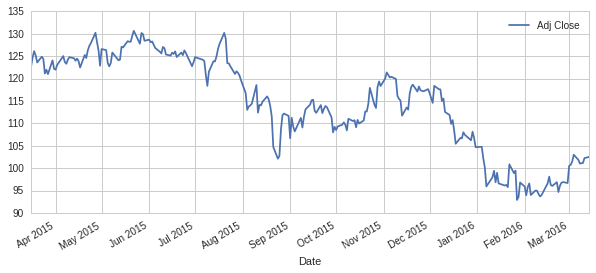

In [7]:
# Usando el precio de cierre
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

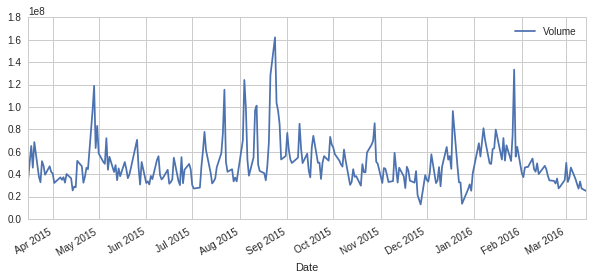

In [8]:
# Usando el volumen
AAPL['Volume'].plot(legend=True, figsize=(10,4))

Calculemos la media movil para las acciones

In [9]:
# Usaremos la funcion incluida en pandas
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)


Grafiquemos las medias moviles

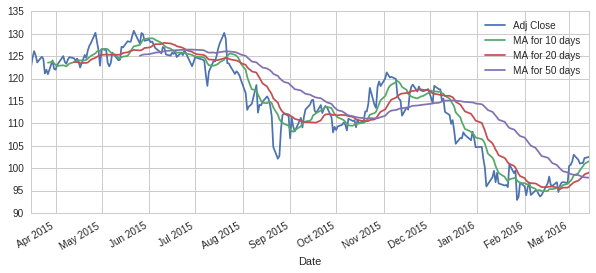

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

###### Analisis del rendimiento diario

Despues de haber hecho un analisis basico, vayamos mas a profundidad.
Haremos un analisis de riesgo para nuestras acciones. Primero miremos mas a detalle los cambios diarios de las acciones y no solo en su valor absoluto.

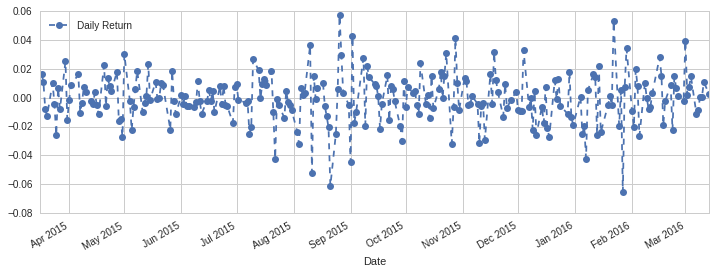

In [11]:
# Usaremos pct_change para encontrar el cambio de porcentaje para cada dia
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Despues graficaremos el porcentaje de rendimiento diario
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Ahora veamos el rendimiento diario promedio usando un histograma

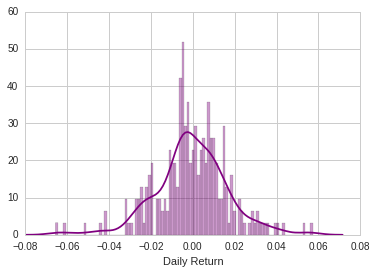

In [12]:
# Seaborn no puede leer valores nulos (Nan)
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Ahora analizaremos el rendimiento de todas nuestras acciones

In [14]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-16,122.675917,373.350006,554.512509,40.456026
2015-03-17,124.727883,371.920013,550.842471,40.592307
2015-03-18,126.131857,375.140015,559.502513,41.371055
2015-03-19,125.179510,373.239990,557.992512,41.166634
2015-03-20,123.608631,378.489990,560.362537,41.740962


Ahora que tenemos todos los precios de cierre, obtendremos el rendimiento diario para todas las acciones

In [16]:
tech_rets = closing_df.pct_change()

Chequemos que tan correlacionadas estan las siguientes dos acciones

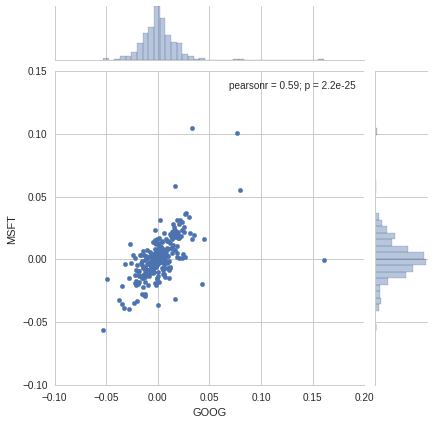

In [17]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Haremos una comparacion para todoas las posibles combinaciones

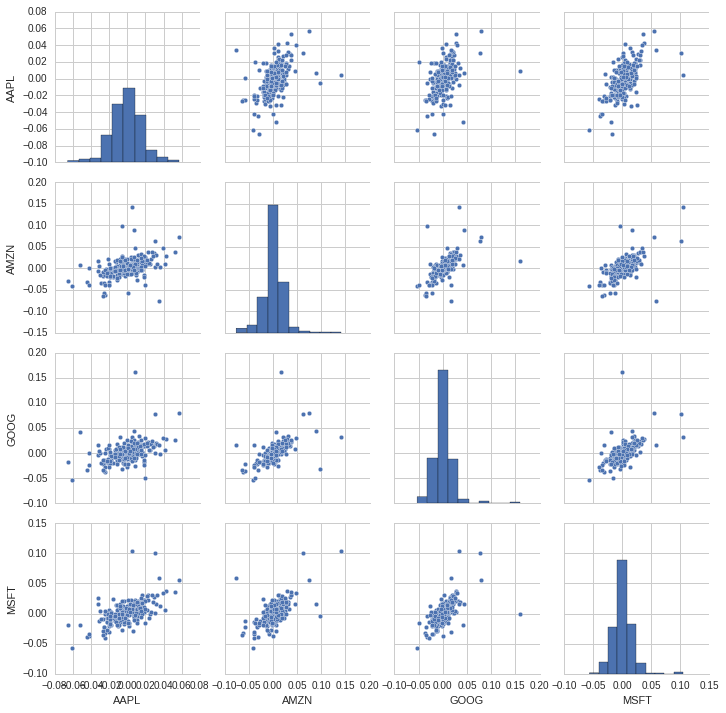

In [18]:
sns.pairplot(tech_rets.dropna())

Podemos observar todas las relaciones del rendimiento diario entre todas las acciones. A simple vista se puede ver una fuerte correlacion entre el rendimiento de Google y Amazon.

Veamos otra forma de visualizar los datos

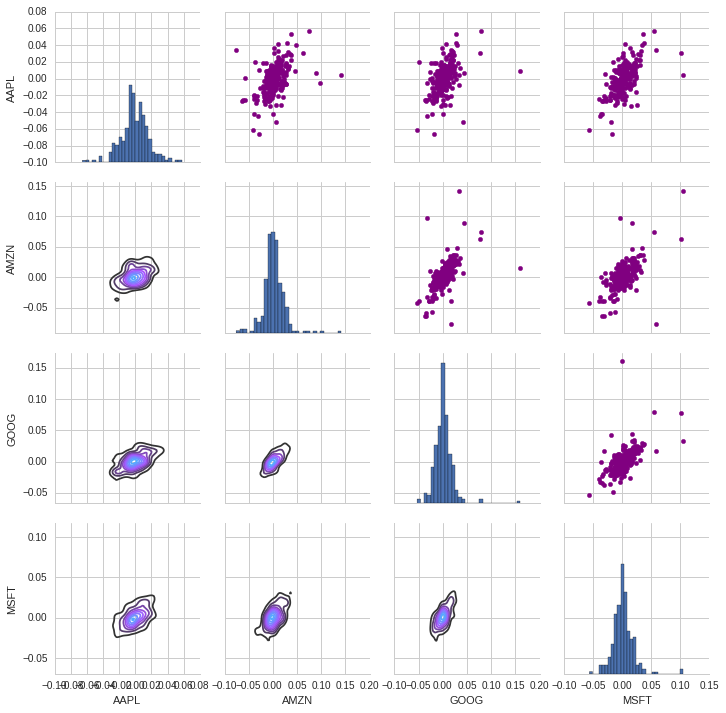

In [19]:
# Preparamos la figura
returns_fig = sns.PairGrid(tech_rets.dropna())

# Configuramos el triangulo superior
returns_fig.map_upper(plt.scatter,color='purple')

# Configuramos el triangulo inferior 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Definimos la diagonal como una serie de histogramas
returns_fig.map_diag(plt.hist,bins=30)

Hagamos lo mismo para los precios de cierre

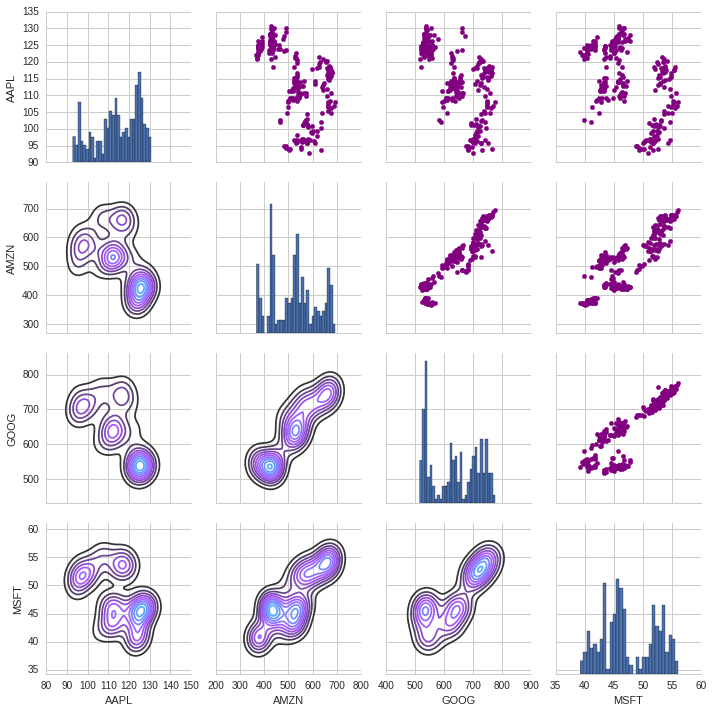

In [20]:
# Preparamos la figura
returns_fig = sns.PairGrid(closing_df)

# Configuramos el triangulo superior
returns_fig.map_upper(plt.scatter,color='purple')

# Configuramos el triangulo inferior 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Definimos la diagonal como una serie de histogramas
returns_fig.map_diag(plt.hist,bins=30)

Finalmente podriamos hacer una grafica de correlacion, para obtener el actual valor numerico de la correlacion entre las acciones. Comparando los precios de cierre pordemos observar una relacion interesante entre Microsoft y Amazon

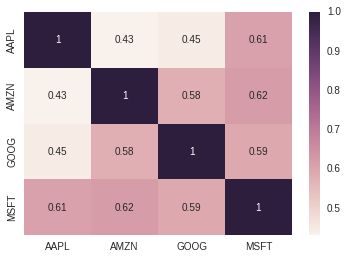

In [24]:
# Hagamos una grafica de correlacion del rendimiento diario
sns.heatmap(tech_rets.dropna().corr(),annot=True)

Podemos comprobar justo lo que sospechamos anteriormente, que Amazon y Microsoft tiene la correlacion mas fuerte. Tambien es interesante obvservar que todas las acciones de tecnologia estan positivamente correlacionadas.

### Analisis de Riesgo

Hay muchas formas de cuatificar el riesgo, una de las mas basicas seria usar la infromacion del porcentaje de rendimiento diario, comparar el rendimiento esperado con la desviacion estandar del rendimiento diario.


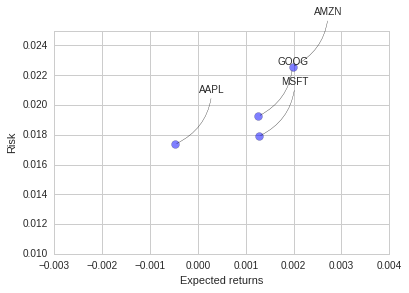

In [25]:
# Limpiemos nuestro dataframe
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Establecemos los limites de la grafica
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

# Establecemos los titulos
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Agregamos etiquetas
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Valor en Riesgo

Podemos tratar el valor en riesgo como la cantidad de dinero que podriamos perder para un intervalo de confianza dado. Hay muchos metodos para calcularlo, en esta ocasion usaremos el metodo "bootstrap".

Para este metodo calcularemos los cuantiles empiricos de un histograma de rendimimiento diario.

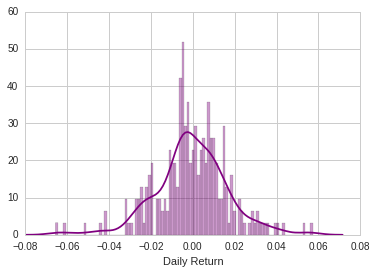

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [27]:
rets['AAPL'].quantile(0.05)

-0.026870597580305255

El 0.05 cuantil empirico de rendimiento diario esta a -.026. Eso significa que con intervalo de confianza del 95%, nuestra peor perdida diaria no excedera el 2.6%.

**Repetir para las otras acciones**

#### Valor en riesgo usando el metodo de monte carlo

Usaremos el metodo de monte carlo para correr muchas simulaciones con condiciones aleatorias del mercado. Despues de esto, agruparemos todas las simulaciones para establecer que tan riesgosa es la accion.

In [28]:
# Delimitar el tiempo
days = 365

# Delta
dt = 1/days

# Tomemos nuestro mu (drift) del rendimiento esperado
mu = rets.mean()['GOOG']

# Ahora tomemos la volatibilidad de la accion de la desviacion estandar
sigma = rets.std()['GOOG']

Crearemos una funcion que reciba como parametros el precio de inicio, el numero de dias, mu y sigma

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):    
    # Definir arreglo de precios
    price = np.zeros(days)
    price[0] = start_price
    # Schok y Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Recorrer el arreglo de precio por el numero de dias
    for x in xrange(1,days):
        
        # Calcular Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calcular Drift
        drift[x] = mu * dt
        # Calcular Precio
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [30]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-16,550.952514,556.852545,546.002476,554.512509,1640900,554.512509
2015-03-17,551.712472,553.802493,548.002468,550.842471,1805500,550.842471
2015-03-18,552.502480,559.782516,547.002472,559.502513,2134500,559.502513
2015-03-19,559.392531,560.802526,556.147548,557.992512,1197200,557.992512
2015-03-20,561.652513,561.722529,559.052548,560.362537,2616800,560.362537


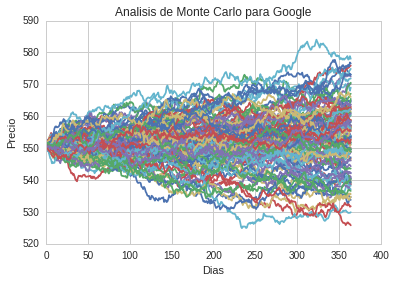

In [31]:
start_price = 550.95

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Dias")
plt.ylabel("Precio")  
plt.title('Analisis de Monte Carlo para Google')

Ahora hagamos un histograma con una ejecucion mucho mas larga

In [32]:
# Numero de ejecuciones
runs = 10000

# Matriz vacia para guardar los datos de los precios finales
simulations = np.zeros(runs)

# Suprimimos la salida
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Establecemos los datos de simulacion como el ultimo precio de la accion para esa ejecucion
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Ya tenemos nuestro arreglo de simulaciones, ahora podemos graficar y usar cuantiles para definir el riesgo de la accion.

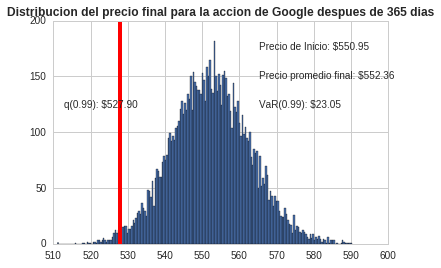

In [33]:
# Vamos a definir q como nuestro cuantil empirico del 1% 
q = np.percentile(simulations, 1)
    
# graficamos nuestra distribucion
plt.hist(simulations,bins=200)

# Detallamos nuestra grafica

# Precio de inicio
plt.figtext(0.6, 0.8, s="Precio de Inicio: $%.2f" %start_price)
# Precio promedio final
plt.figtext(0.6, 0.7, "Precio promedio final: $%.2f" % simulations.mean())

# Varianza del precio (dentro del intervalo de confianza de 99%)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Mostrar el cuantil del 1%
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Dibujar una linea en el cualtil del 1%
plt.axvline(x=q, linewidth=4, color='r')

# Titulo
plt.title(u"Distribucion del precio final para la accion de Google despues de %s dias" % days, weight='bold');


Muy bien! Ahora que tenemos el cuantil empirico al 1% de la distribucion de precio final, podemos estimar el valor en riesgo para la accion de Google, la cual es de \$23.05 por cada inversion de $569.85

Podemos concluir que para cada accion inicial que se compre, se pondra en riesgo alrededor de \$23.05 el 99% de las veces de nuestra simulacion de monte carlo